<a href="https://colab.research.google.com/github/leotodisco/QUALITY/blob/main/1_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict
!pip install seaborn
!pip install matplotlib
!pip install aif360
!pip install 'aif360[Reductions]'
!pip install 'aif360[inFairness]'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 2.2 MB/s eta 0:00:00


# K-Fold Experiments and Models Selections

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:01<00:00, 16.82it/s]

[LightGBM] [Info] Number of positive: 291, number of negative: 513
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361940 -> initscore=-0.566953
[LightGBM] [Info] Start training from score -0.566953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

100%|██████████| 29/29 [00:02<00:00, 12.92it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.94,0.92,0.92,0.94,0.09
LabelPropagation,0.94,0.92,0.92,0.94,0.06
RandomForestClassifier,0.94,0.92,0.92,0.94,0.20
LGBMClassifier,0.94,0.92,0.92,0.93,0.29
ExtraTreesClassifier,0.93,0.90,0.90,0.93,0.15
DecisionTreeClassifier,0.92,0.90,0.90,0.92,0.04
SVC,0.93,0.90,0.90,0.93,0.09
BaggingClassifier,0.93,0.90,0.90,0.92,0.05
NuSVC,0.93,0.89,0.89,0.92,0.06


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


result = pd.DataFrame(columns=["Fold","Model","Accuracy","F1-Score"], index=np.arange(270))
fold = KFold(n_splits=10, random_state=42, shuffle=True)

counter = 0
foldcounter = 1
for train_index, test_index in fold.split(X, y):
        print("Processing Fold "+ str(foldcounter) + " ...")
        X_train, X_test, y_train, y_test = \
            X[ X.index.isin(train_index)], X[ X.index.isin(test_index)], y[train_index], y[test_index]
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train, X_test, y_train, y_test)
        for model in models[:].iterrows():
          result.loc[counter]["Fold"] = foldcounter
          result.loc[counter]["Model"] = model[0]
          result.loc[counter]["Accuracy"] = round(model[1][0],3)
          result.loc[counter]["F1-Score"] = round(model[1][3],3)
          counter += 1

        foldcounter += 1

Processing Fold 1 ...


 86%|████████▌ | 25/29 [00:01<00:00, 14.09it/s]

[LightGBM] [Info] Number of positive: 321, number of negative: 584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354696 -> initscore=-0.598460
[LightGBM] [Info] Start training from score -0.598460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 13.03it/s]


Processing Fold 2 ...


 97%|█████████▋| 28/29 [00:02<00:00, 17.05it/s]

[LightGBM] [Info] Number of positive: 329, number of negative: 576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363536 -> initscore=-0.560050
[LightGBM] [Info] Start training from score -0.560050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 12.35it/s]


Processing Fold 3 ...


 97%|█████████▋| 28/29 [00:01<00:00, 17.17it/s]

[LightGBM] [Info] Number of positive: 318, number of negative: 587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351381 -> initscore=-0.612973
[LightGBM] [Info] Start training from score -0.612973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 12.74it/s]


Processing Fold 4 ...


 86%|████████▌ | 25/29 [00:01<00:00, 16.09it/s]

[LightGBM] [Info] Number of positive: 315, number of negative: 590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348066 -> initscore=-0.627550
[LightGBM] [Info] Start training from score -0.627550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 14.35it/s]


Processing Fold 5 ...


 86%|████████▌ | 25/29 [00:01<00:00, 13.93it/s]

[LightGBM] [Info] Number of positive: 318, number of negative: 587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351381 -> initscore=-0.612973
[LightGBM] [Info] Start training from score -0.612973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 13.68it/s]


Processing Fold 6 ...


 97%|█████████▋| 28/29 [00:01<00:00, 17.49it/s]

[LightGBM] [Info] Number of positive: 327, number of negative: 578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361326 -> initscore=-0.569614
[LightGBM] [Info] Start training from score -0.569614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 12.88it/s]


Processing Fold 7 ...


 97%|█████████▋| 28/29 [00:01<00:00, 17.45it/s]

[LightGBM] [Info] Number of positive: 325, number of negative: 581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358720 -> initscore=-0.580926
[LightGBM] [Info] Start training from score -0.580926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 13.79it/s]


Processing Fold 8 ...


 86%|████████▌ | 25/29 [00:01<00:00, 14.46it/s]

[LightGBM] [Info] Number of positive: 327, number of negative: 579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360927 -> initscore=-0.571342
[LightGBM] [Info] Start training from score -0.571342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 14.01it/s]


Processing Fold 9 ...


 86%|████████▌ | 25/29 [00:01<00:00, 13.39it/s]

[LightGBM] [Info] Number of positive: 327, number of negative: 579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360927 -> initscore=-0.571342
[LightGBM] [Info] Start training from score -0.571342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 12.67it/s]


Processing Fold 10 ...


 86%|████████▌ | 25/29 [00:01<00:00, 14.10it/s]

[LightGBM] [Info] Number of positive: 324, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357616 -> initscore=-0.585727
[LightGBM] [Info] Start training from score -0.585727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 13.66it/s]


In [ ]:
print(result.groupby('Model', as_index=False)['Accuracy'].mean().sort_values(by='Accuracy', ascending=False))

                            Model Accuracy
21         RandomForestClassifier     0.96
7            ExtraTreesClassifier     0.96
11               LabelPropagation     0.95
12                 LabelSpreading     0.95
10                 LGBMClassifier     0.95
25                            SVC     0.94
9            KNeighborsClassifier     0.94
1               BaggingClassifier     0.93
6             ExtraTreeClassifier     0.92
17                          NuSVC     0.92
14                      LinearSVC     0.91
15             LogisticRegression     0.91
4          DecisionTreeClassifier     0.91
22                RidgeClassifier     0.91
13     LinearDiscriminantAnalysis     0.91
23              RidgeClassifierCV     0.91
0              AdaBoostClassifier     0.90
24                  SGDClassifier     0.87
18    PassiveAggressiveClassifier     0.85
19                     Perceptron     0.85
3          CalibratedClassifierCV     0.84
2                     BernoulliNB     0.84
20  Quadrat

In [ ]:
print(result.groupby('Model', as_index=False)['F1-Score'].mean().sort_values(by='F1-Score', ascending=False))

                            Model F1-Score
21         RandomForestClassifier     0.96
7            ExtraTreesClassifier     0.96
11               LabelPropagation     0.95
12                 LabelSpreading     0.95
10                 LGBMClassifier     0.95
25                            SVC     0.94
9            KNeighborsClassifier     0.94
1               BaggingClassifier     0.93
6             ExtraTreeClassifier     0.92
17                          NuSVC     0.92
14                      LinearSVC     0.91
15             LogisticRegression     0.91
4          DecisionTreeClassifier     0.91
13     LinearDiscriminantAnalysis     0.91
22                RidgeClassifier     0.91
23              RidgeClassifierCV     0.90
0              AdaBoostClassifier     0.90
24                  SGDClassifier     0.87
18    PassiveAggressiveClassifier     0.85
19                     Perceptron     0.85
2                     BernoulliNB     0.84
3          CalibratedClassifierCV     0.83
20  Quadrat

The 5 best results are provided by: (TODO)

- **ExtraTreesClassifier** (Accuracy: 0.96, F1: 0.96)
- **RandomForestClassifier** (Accuracy: 0.96, F1: 0.96)
- **LabelPropagation** (Accuracy: 0.95, F1: 0.95)
- **LabelSpreading** (Accuracy: 0.95, F1: 0.95)
- **LGBMClassifier** (Accuracy: 0.95, F1: 0.95)

# HyperParameter Optimization



# ExtraTreesClassifier HyperParameter Optimization

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:
# Imposta il modello
model = ExtraTreesClassifier(random_state=0)

# Definisci la griglia dei parametri
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Definisci il custom scoring
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Configura la GridSearchCV
grid_extraTreesClassifier = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Definisci le caratteristiche categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

# Supponiamo che X_train e y_train siano già definiti
# Dividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applica il preprocessor sui dati di training
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
# Fitting del modello con la GridSearchCV
grid_extraTreesClassifier.fit(X_train_transformed, y_train)

# Stampa i migliori parametri dopo la ricerca
print(grid_extraTreesClassifier.best_params_)

# Stampa il modello migliore dopo la ricerca degli iperparametri
print(grid_extraTreesClassifier.best_estimator_)

# Applica il preprocessor sui dati di test e valuta il modello sul test set
X_test_transformed = preprocessor.transform(X_test)
test_score = grid_extraTreesClassifier.score(X_test_transformed, y_test)
print(f'Test score: {test_score}')

Output streaming troncato alle ultime 5000 righe.
[CV 5/10] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; accuracy: (test=0.938) f1: (test=0.953) precision: (test=0.911) recall: (test=1.000) total time=   0.0s
[CV 6/10] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; accuracy: (test=0.963) f1: (test=0.971) precision: (test=0.944) recall: (test=1.000) total time=   0.0s
[CV 7/10] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; accuracy: (test=0.938) f1: (test=0.951) precision: (test=0.942) recall: (test=0.961) total time=   0.0s
[CV 8/10] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; accuracy: (test=0.963) f1: (test=0.970) precision: (test=0.980) recall: (test=0.961) total time=   0.0s
[CV 9/10] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; accu

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

# GridSearchCV - RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
dataset = pd.read_csv(data_path)
dataset = dataset.sample(frac=1).reset_index(drop=True)
X = dataset.drop('target',axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:
# Imposta il modello
model = RandomForestClassifier(random_state=0)

# Definisci la griglia dei parametri
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Definisci il custom scoring
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Configura la GridSearchCV
grid_randomForestClassifier = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Definisci le caratteristiche categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

# Supponiamo che X_train e y_train siano già definiti
# Dividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applica il preprocessor sui dati di training
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
# Fitting del modello con la GridSearchCV
grid_randomForestClassifier.fit(X_train_transformed, y_train)

# Stampa i migliori parametri dopo la ricerca
print(grid_randomForestClassifier.best_params_)

# Stampa il modello migliore dopo la ricerca degli iperparametri
print(grid_randomForestClassifier.best_estimator_)

# Applica il preprocessor sui dati di test e valuta il modello sul test set
X_test_transformed = preprocessor.transform(X_test)
test_score = grid_randomForestClassifier.score(X_test_transformed, y_test)
print(f'Test score: {test_score}')

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.914) f1: (test=0.936) precision: (test=0.895) recall: (test=0.981) total time=   0.2s
[CV 2/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.852) f1: (test=0.891) precision: (test=0.845) recall: (test=0.942) total time=   0.2s
[CV 3/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.889) f1: (test=0.920) precision: (test=0.852) recall: (test=1.000) total time=   0.2s
[CV 4/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.914) f1: (test=0.937) precision: (test=0.881) recall: (test=1.000) total time=   0.2s
[CV 5/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy:

{'bootstrap': False, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

# LabelPropagation - GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import load_iris

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:
# Imposta il modello
model = LabelPropagation()

# Definisci la griglia dei parametri
param_grid = {
    'kernel': ['knn', 'rbf'],
    'gamma': [20, 10, 1, 0.1, 0.01],  # Only used for 'rbf' kernel
    'n_neighbors': [3, 5, 7, 9]  # Only used for 'knn' kernel
}

# Definisci il custom scoring
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Configura la GridSearchCV
grid_labelPropagationClassifier = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Definisci le caratteristiche categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

# Supponiamo che X_train e y_train siano già definiti
# Dividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applica il preprocessor sui dati di training
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
# Fitting del modello con la GridSearchCV
grid_labelPropagationClassifier.fit(X_train_transformed.toarray(), y_train)

# Stampa i migliori parametri dopo la ricerca
print(grid_labelPropagationClassifier.best_params_)

# Stampa il modello migliore dopo la ricerca degli iperparametri
print(grid_labelPropagationClassifier.best_estimator_)

# Applica il preprocessor sui dati di test e valuta il modello sul test set
X_test_transformed = preprocessor.transform(X_test)
test_score = grid_labelPropagationClassifier.score(X_test_transformed, y_test)
print(f'Test score: {test_score}')

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END gamma=20, kernel=knn, n_neighbors=3; accuracy: (test=0.716) f1: (test=0.793) precision: (test=0.759) recall: (test=0.830) total time=   0.1s
[CV 2/10] END gamma=20, kernel=knn, n_neighbors=3; accuracy: (test=0.840) f1: (test=0.881) precision: (test=0.857) recall: (test=0.906) total time=   0.1s
[CV 3/10] END gamma=20, kernel=knn, n_neighbors=3; accuracy: (test=0.765) f1: (test=0.819) precision: (test=0.827) recall: (test=0.811) total time=   0.1s
[CV 4/10] END gamma=20, kernel=knn, n_neighbors=3; accuracy: (test=0.790) f1: (test=0.841) precision: (test=0.833) recall: (test=0.849) total time=   0.1s
[CV 5/10] END gamma=20, kernel=knn, n_neighbors=3; accuracy: (test=0.838) f1: (test=0.885) precision: (test=0.833) recall: (test=0.943) total time=   0.1s
[CV 6/10] END gamma=20, kernel=knn, n_neighbors=3; accuracy: (test=0.812) f1: (test=0.860) precision: (test=0.852) recall: (test=0.868) total time=   0.1s
[CV 7/1

{'gamma': 20, 'kernel': 'rbf', 'n_neighbors': 3}

# GridSearchCV - LabelSpreading

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import load_iris

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:
# Imposta il modello
model = LabelSpreading()

# Definisci la griglia dei parametri
param_grid = {
    'kernel': ['knn', 'rbf'],
    'gamma': [20, 10, 1, 0.1, 0.01],  # Only used for 'rbf' kernel
    'n_neighbors': [3, 5, 7, 9],  # Only used for 'knn' kernel
    'max_iter' : [30, 50, 100],
    'alpha': [0.2, 0.4]
}

# Definisci il custom scoring
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Configura la GridSearchCV
grid_labelSpreadingClassifier = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Definisci le caratteristiche categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

# Supponiamo che X_train e y_train siano già definiti
# Dividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applica il preprocessor sui dati di training
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
# Fitting del modello con la GridSearchCV
grid_labelSpreadingClassifier.fit(X_train_transformed.toarray(), y_train)

# Stampa i migliori parametri dopo la ricerca
print(grid_labelSpreadingClassifier.best_params_)

# Stampa il modello migliore dopo la ricerca degli iperparametri
print(grid_labelSpreadingClassifier.best_estimator_)

# Applica il preprocessor sui dati di test e valuta il modello sul test set
X_test_transformed = preprocessor.transform(X_test)
test_score = grid_labelSpreadingClassifier.score(X_test_transformed, y_test)
print(f'Test score: {test_score}')

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV 1/10] END alpha=0.2, gamma=20, kernel=knn, max_iter=30, n_neighbors=3; accuracy: (test=0.901) f1: (test=0.927) precision: (test=0.879) recall: (test=0.981) total time=   0.0s
[CV 2/10] END alpha=0.2, gamma=20, kernel=knn, max_iter=30, n_neighbors=3; accuracy: (test=0.778) f1: (test=0.830) precision: (test=0.800) recall: (test=0.863) total time=   0.0s
[CV 3/10] END alpha=0.2, gamma=20, kernel=knn, max_iter=30, n_neighbors=3; accuracy: (test=0.765) f1: (test=0.819) precision: (test=0.796) recall: (test=0.843) total time=   0.0s
[CV 4/10] END alpha=0.2, gamma=20, kernel=knn, max_iter=30, n_neighbors=3; accuracy: (test=0.827) f1: (test=0.870) precision: (test=0.825) recall: (test=0.922) total time=   0.0s
[CV 5/10] END alpha=0.2, gamma=20, kernel=knn, max_iter=30, n_neighbors=3; accuracy: (test=0.825) f1: (test=0.863) precision: (test=0.863) recall: (test=0.863) total time=   0.0s
[CV 6/10] END alpha=0.2, gamma=20, kerne

{'alpha': 0.4, 'gamma': 20, 'kernel': 'rbf', 'max_iter': 30, 'n_neighbors': 3}

# LGBMClassifer - GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import load_iris

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

param_grid = {
    'num_leaves': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'min_child_samples': [20, 50, 100],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    #'reg_alpha': [0, 0.1, 0.5, 1.0],
    #'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Definisci il custom scoring
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Configura la GridSearchCV
grid_LGBMClassifier = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Definisci le caratteristiche categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

# Supponiamo che X_train e y_train siano già definiti
# Dividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applica il preprocessor sui dati di training
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
# Fitting del modello con la GridSearchCV
grid_LGBMClassifier.fit(X_train_transformed, y_train)

# Stampa i migliori parametri dopo la ricerca
print(grid_LGBMClassifier.best_params_)

# Stampa il modello migliore dopo la ricerca degli iperparametri
print(grid_LGBMClassifier.best_estimator_)

# Applica il preprocessor sui dati di test e valuta il modello sul test set
X_test_transformed = preprocessor.transform(X_test)
test_score = grid_LGBMClassifier.score(X_test_transformed, y_test)
print(f'Test score: {test_score}')


Output streaming troncato alle ultime 5000 righe.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [ ]:
print(X_train_transformed)

  (0, 3)	1.0
  (0, 8)	1.0
  (0, 17)	1.0
  (0, 23)	1.0
  (0, 25)	1.0
  (0, 29)	1.0
  (0, 36)	1.0
  (0, 37)	1.0
  (0, 50)	1.0
  (0, 67)	1.0
  (0, 68)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 78)	1.0
  (0, 79)	21.0
  (0, 80)	1550.0
  (0, 81)	3.0
  (0, 82)	1.0
  (0, 83)	1.0
  (0, 84)	2.0
  (1, 3)	1.0
  (1, 8)	1.0
  (1, 14)	1.0
  (1, 23)	1.0
  (1, 26)	1.0
  :	:
  (802, 80)	1450.0
  (802, 81)	4.0
  (802, 82)	2.0
  (802, 83)	2.0
  (802, 84)	1.0
  (803, 2)	1.0
  (803, 7)	1.0
  (803, 9)	1.0
  (803, 21)	1.0
  (803, 28)	1.0
  (803, 30)	1.0
  (803, 34)	1.0
  (803, 38)	1.0
  (803, 54)	1.0
  (803, 67)	1.0
  (803, 70)	1.0
  (803, 74)	1.0
  (803, 76)	1.0
  (803, 78)	1.0
  (803, 79)	27.0
  (803, 80)	3000.0
  (803, 81)	3.0
  (803, 82)	1.0
  (803, 83)	2.0
  (803, 84)	1.0


In [ ]:

from sklearn.metrics import classification_report, accuracy_score
label_spread = LabelSpreading(kernel='knn', alpha=0.8)

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

X_train_transformed = preprocessor.fit_transform(X_train)

label_spread.fit(X_train_transformed.toarray(), y_train)

X_test_transformed = preprocessor.transform(X_test)
y_pred = label_spread.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
accuracy

# GridSearchCV - SVC

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:
from sklearn.svm import SVC

# Definisci il modello SVC
model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_svc = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)

categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']


# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

# Supponiamo che X_train e y_train siano già definiti
# Dividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applica il preprocessor sui dati di training
preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)

# fitting the model for grid search
grid_svc.fit(X_train_transformed, y_train)

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

X_test_transformed = preprocessor.transform(X_test)

grid_svc.score(X_test_transformed, y_test)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
[CV 1/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.914) f1: (test=0.933) precision: (test=0.925) recall: (test=0.942) total time=   9.2s
[CV 2/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.901) f1: (test=0.926) precision: (test=0.893) recall: (test=0.962) total time=   6.6s
[CV 3/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.901) f1: (test=0.925) precision: (test=0.907) recall: (test=0.942) total time=   3.7s
[CV 4/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.877) f1: (test=0.906) precision: (test=0.889) recall: (test=0.923) total time=   6.3s
[CV 5/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.887) f1: (test=0.913) precision: (test=0.904) recall: (test=0.922) total time=   5.0s
[CV 6/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accurac

# RQ0: somiglianza fra dataset originale e dataset generato sinteticamente


In [ ]:
dataset_originale = pd.read_csv("/content/drive/MyDrive/datasets/dataset_Adult.csv")
dataset_sintetico = pd.read_csv("/content/drive/MyDrive/datasets/generated_1_shot_1.csv")

righe_comuni = pd.merge(dataset_originale, dataset_sintetico, how='inner')

print(f"\nRighe comuni: \n{righe_comuni}\n")

num_righe_comuni = righe_comuni.shape[0]
print(f"\nNumero di righe uguali tra i due DataFrame: {num_righe_comuni}\n")


Righe comuni: 
Empty DataFrame
Columns: [Attribute1, Attribute2, Attribute3, Attribute4, Attribute5, Attribute6, Attribute7, Attribute8, Attribute9, Attribute10, Attribute11, Attribute12, Attribute13, Attribute14, Attribute15, Attribute16, Attribute17, Attribute18, Attribute19, Attribute20, target, Target]
Index: []

[0 rows x 22 columns]


Numero di righe uguali tra i due DataFrame: 0



In [ ]:
# Controlliamo il numero di righe duplicate nel dataset

duplicate_rows = dataset_sintetico.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Numero di righe duplicate: {num_duplicates}")

Numero di righe duplicate: 86


## Plot dei dataset

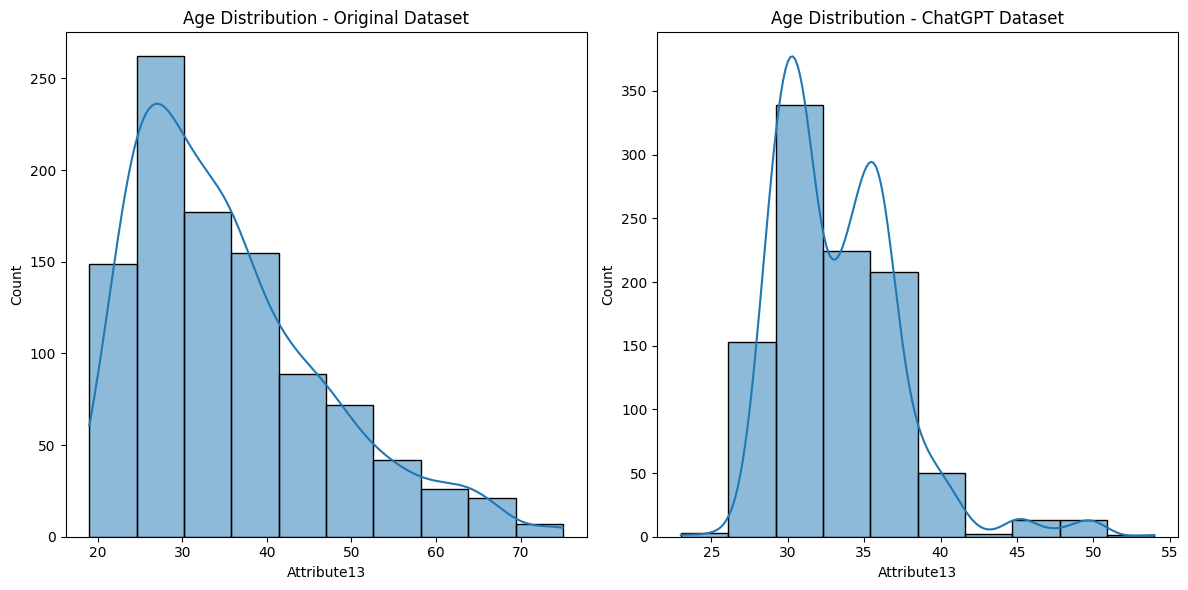

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_originale['Attribute13'], bins=10, kde=True)
plt.title('Age Distribution - Original Dataset')

plt.subplot(1, 2, 2)
sns.histplot(dataset_sintetico['Attribute13'], bins=10, kde=True)
plt.title('Age Distribution - ChatGPT Dataset')

plt.tight_layout()
plt.show()


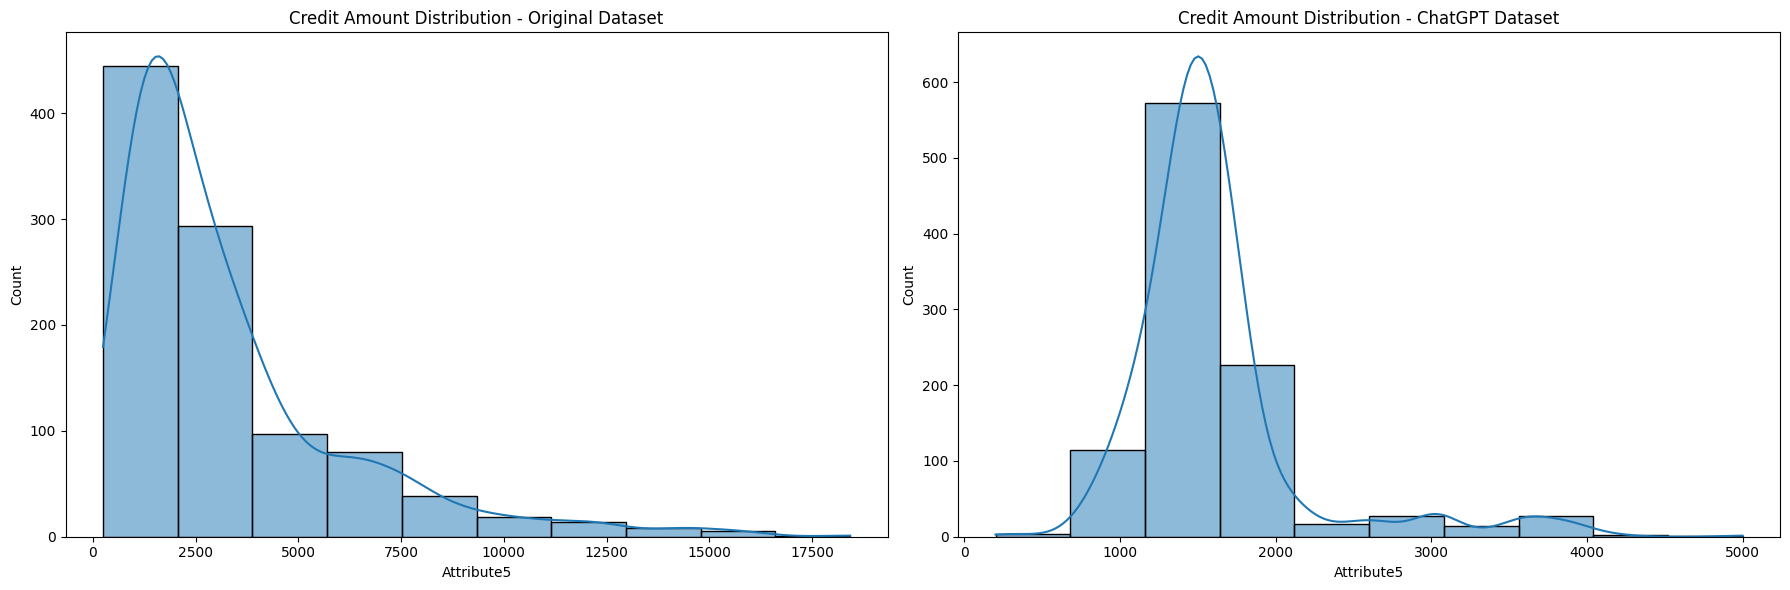

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_originale['Attribute5'], bins=10, kde=True)
plt.title('Credit Amount Distribution - Original Dataset')

plt.subplot(1, 2, 2)
sns.histplot(dataset_sintetico['Attribute5'], bins=10, kde=True)
plt.title('Credit Amount Distribution - ChatGPT Dataset')

plt.tight_layout()
plt.show()

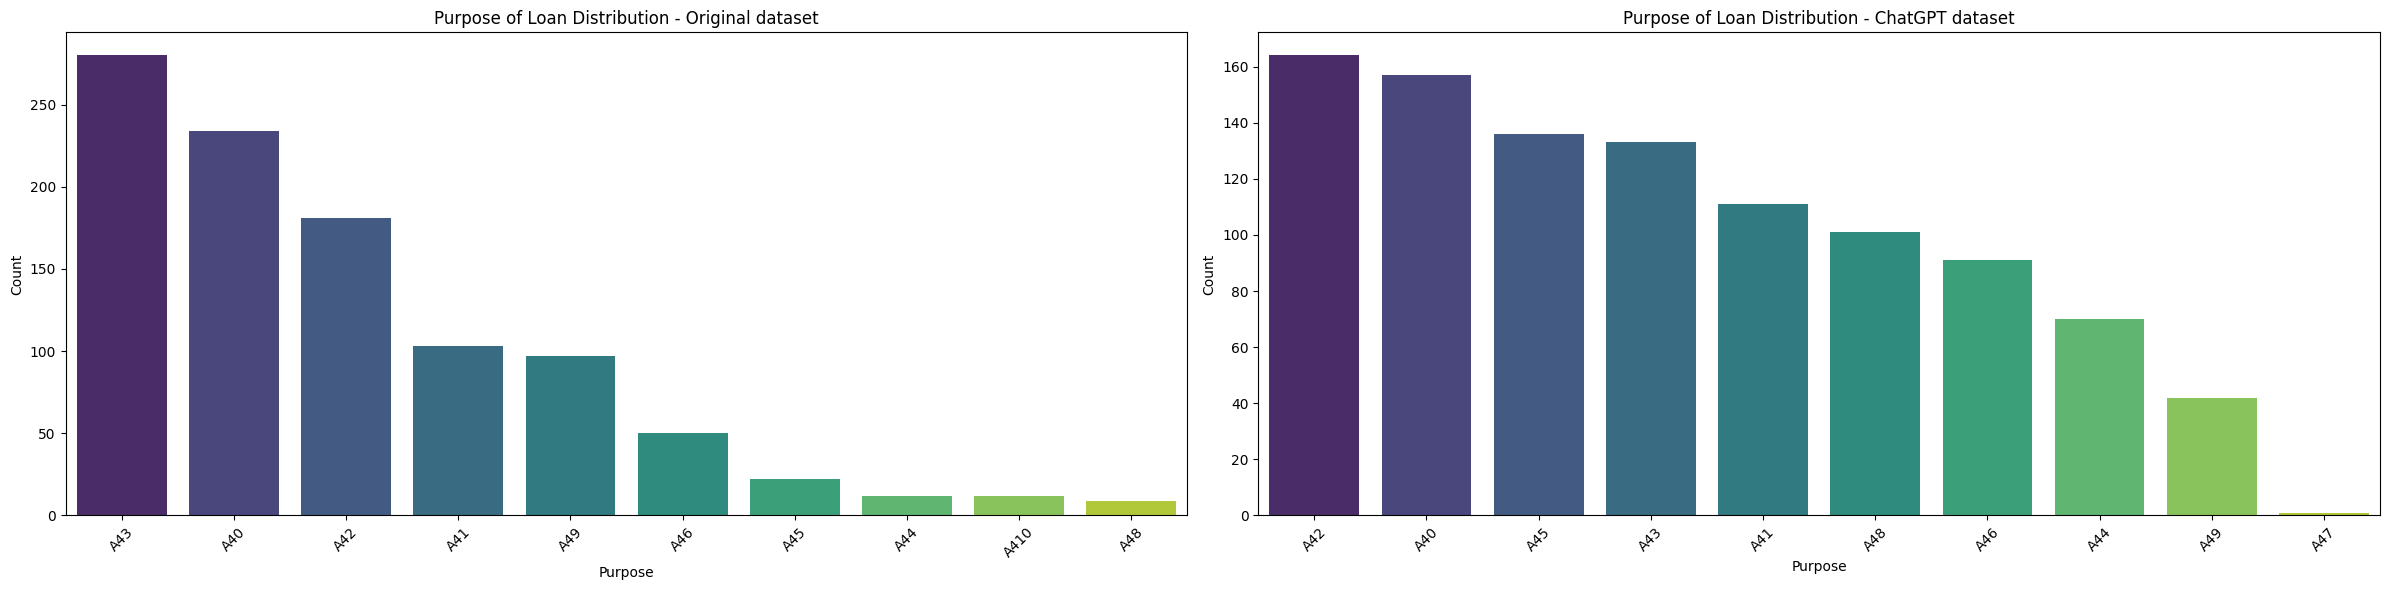

These are all the values for Purpose (Attribute4) in CHATGPT dataset: ['A43' 'A42' 'A40' 'A49' 'A44' 'A45' 'A48' 'A41' 'A46' 'A47']
These are all the values for Purpose (Attribute4) in the Original dataset: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']


In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Attribute4', data=dataset_originale, order=dataset_originale['Attribute4'].value_counts().index, palette="viridis")
plt.title('Purpose of Loan Distribution - Original dataset')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Attribute4', data=dataset_sintetico, order=dataset_sintetico['Attribute4'].value_counts().index, palette="viridis")
plt.title('Purpose of Loan Distribution - ChatGPT dataset')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"These are all the values for Purpose (Attribute4) in CHATGPT dataset: {dataset_sintetico['Attribute4'].unique()}")
print(f"These are all the values for Purpose (Attribute4) in the Original dataset: {dataset_originale['Attribute4'].unique()}")

# RQ1

Il modello migliore è RandomForest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
dataset = pd.read_csv(data_path)
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Definisci le caratteristiche categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Configura il OneHotEncoder e il preprocessor
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)


# Creiamo i nomi delle colonne per le feature trasformate
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Creiamo i nomi delle colonne per il DataFrame finale
colonne_numeriche = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
feature_names = list(ohe_feature_names) + colonne_numeriche

In [ ]:
feature_names

['Attribute1_A11',
 'Attribute1_A12',
 'Attribute1_A13',
 'Attribute1_A14',
 'Attribute3_A30',
 'Attribute3_A31',
 'Attribute3_A32',
 'Attribute3_A33',
 'Attribute3_A34',
 'Attribute4_A40',
 'Attribute4_A41',
 'Attribute4_A42',
 'Attribute4_A43',
 'Attribute4_A44',
 'Attribute4_A45',
 'Attribute4_A46',
 'Attribute4_A47',
 'Attribute4_A48',
 'Attribute4_A49',
 'Attribute6_A61',
 'Attribute6_A62',
 'Attribute6_A63',
 'Attribute6_A64',
 'Attribute6_A65',
 'Attribute7_A71',
 'Attribute7_A72',
 'Attribute7_A73',
 'Attribute7_A74',
 'Attribute7_A75',
 'Attribute9_A91',
 'Attribute9_A92',
 'Attribute9_A93',
 'Attribute9_A94',
 'Attribute9_A95',
 'Attribute10_A101',
 'Attribute10_A102',
 'Attribute10_A103',
 'Attribute12_A121',
 'Attribute12_A122',
 'Attribute12_A123',
 'Attribute12_A124',
 'Attribute14_A141',
 'Attribute14_A142',
 'Attribute14_A143',
 'Attribute15_A151',
 'Attribute15_A152',
 'Attribute15_A153',
 'Attribute17_A171',
 'Attribute17_A172',
 'Attribute17_A173',
 'Attribute17_A174

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

random_forest_model = RandomForestClassifier(bootstrap = False, max_depth = 25, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

random_forest_model.fit(X_train, y_train)
print("Shape di X_train:", X_train.shape)
print("Shape di X_test:", X_test.shape)


y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score = {f1}")

Shape di X_train: (804, 86)
Shape di X_test: (202, 86)
Accuracy = 0.9356435643564357
F1 score = 0.9534050179211468


In [ ]:
data_path = "/content/drive/MyDrive/datasets/dataset_Adult.csv"
dataset_originale = pd.read_csv(data_path)

X = dataset_originale.drop('target', axis=1)
y = dataset_originale['target']

X = preprocessor.transform(X)

In [ ]:
# Qui si vedono le performance del modello sul dataset originale
y_pred_original_dataset = random_forest_model.predict(X)
accuracy = accuracy_score(y, y_pred_original_dataset)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y, y_pred_original_dataset)
print(f"F1 score = {f1}")

Accuracy = 0.463
F1 score = 0.6077428780131483


# Proviamo a rimuovere tutti i duplicati dal dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
dataset = pd.read_csv(data_path)
dataset = dataset.drop_duplicates()

X = dataset.drop('target', axis=1)
y = dataset['target']

X_train_no_dup, X_test_no_dup, y_train_no_dup, y_test_no_dup = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_no_dup = preprocessor.transform(X_train_no_dup)
X_test_no_dup = preprocessor.transform(X_test_no_dup)

print("Shape di X_train:", X_train_no_dup.shape)
print("Shape di X_test:", X_test_no_dup.shape)


Shape di X_train: (736, 86)
Shape di X_test: (184, 86)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

random_forest_model = RandomForestClassifier(max_depth = None, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 10, n_estimators = 200)

random_forest_model.fit(X_train_no_dup, y_train_no_dup)

y_pred_no_dup = random_forest_model.predict(X_test_no_dup)
accuracy = accuracy_score(y_test_no_dup, y_pred_no_dup)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_test_no_dup, y_pred_no_dup)
print(f"F1 score = {f1}")

Accuracy = 0.9565217391304348
F1 score = 0.9685039370078741


In [ ]:
data_path = "/content/drive/MyDrive/datasets/dataset_Adult.csv"
dataset = pd.read_csv(data_path)

X_original = dataset.drop('target', axis=1)
y_original = dataset['target']
X_original = preprocessor.transform(X_original)

In [ ]:
# Qui si vedono le performance del modello sul dataset originale
y_pred_original_dataset = random_forest_model.predict(X_original)
accuracy = accuracy_score(y_original, y_pred_original_dataset)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_original, y_pred_original_dataset)
print(f"F1 score = {f1}")

Accuracy = 0.495
F1 score = 0.6405693950177935


# RQ2

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd


data_path = "/content/drive/MyDrive/datasets/generated_1_shot_1.csv"
df = pd.read_csv(data_path)
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.datasets import StandardDataset
from aif360.metrics import ClassificationMetric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

"""
- Sex, privileged: Male, unprivileged: Female   | Attribute9
- Age, privileged: Old, unprivileged: Young     | Attribute13

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
        A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single
"""

categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False )
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)


# Creiamo i nomi delle colonne per le feature trasformate
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Creiamo i nomi delle colonne per il DataFrame finale
colonne_numeriche = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
feature_names = list(ohe_feature_names) + colonne_numeriche

sex_features = ['Attribute9_A91','Attribute9_A92','Attribute9_A93','Attribute9_A94','Attribute9_A95'] # attributi protetti

fairness_dataset = pd.DataFrame(X_test.copy(), columns=feature_names)
fairness_dataset['target'] = y_test.to_numpy() # and join the target feature with the others

predictions = fairness_dataset
predictions['target'] = y_pred # but this time the target feature is made by the predictions of our model

# This is the object made of the original dataset
aif_sex_dataset = BinaryLabelDataset( # Base class for all structured datasets with binary labels.
        df=fairness_dataset,
        favorable_label=2.0, # This means that a prediction is biased toward the privileged attribute if its value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=sex_features,
        privileged_protected_attributes=['Attribute9_A91', 'Attribute9_A93', 'Attribute9_A94'] # here we tell AIF that we want to check for predictions that somehow privilege the attribute "sex_Male"
)

# We do the same thing but with the predictions dataset
aif_sex_pred = BinaryLabelDataset(
        df=predictions,
        favorable_label=2.0, # This means that a prediction is biased toward the privileged attribute if its value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=sex_features,
        privileged_protected_attributes=['Attribute9_A91', 'Attribute9_A93', 'Attribute9_A94'] # here we tell AIF that we want to check for predictions that somehow privilege the attribute "sex_Male"
)


sex_privileged_group = [{'Attribute9_A91':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        {'Attribute9_A93':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        {'Attribute9_A94':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        ] # The privileged group is made of males

sex_unprivileged_group = [{'Attribute9_A92':1.0,
                         'Attribute9_A91':0.0,
                         'Attribute9_A93':0.0,
                         'Attribute9_A94':0.0,
                         },
                        {'Attribute9_A95':1.0,
                         'Attribute9_A91':0.0,
                         'Attribute9_A93':0.0,
                         'Attribute9_A94':0.0,
                         }] # The unprivileged group is made of females

# We provide the ClassificationMetric object with all the information needed:
# aif_sex_dataset - The original test set
# aif_sex_pred - A dataset containing the predictions of the model
# sex_privileged_group - The privileged group
# sex_unprivileged_group - The unprivileged group
fairness_metrics = ClassificationMetric(dataset=aif_sex_dataset,
                               classified_dataset=aif_sex_pred,
                               unprivileged_groups=sex_unprivileged_group,
                               privileged_groups=sex_privileged_group)

# Values less than 0 indicate that privileged group has higher
# proportion of predicted positive outcomes than unprivileged group.
# Value higher than 0 indicates that unprivileged group has higher proportion
# of predicted positive outcomes than privileged group.
SPD = round(fairness_metrics.statistical_parity_difference(),3)

# Measures the deviation from the equality of opportunity, which means that the same
# proportion of each population receives the favorable outcome. This measure must be equal to 0 to be fair.
EOD = round(fairness_metrics.equal_opportunity_difference(),3)

# Average of difference in False Positive Rate and True Positive Rate for unprivileged and privileged groups
# A value of 0 indicates equality of odds, which means that samples in both the privileged and unprivileged
# groups have the same probability of being classified positively.
AOD = round(fairness_metrics.average_odds_difference(),3)

print(f"Statistical Parity Difference (SPD): {SPD}.  The ideal value of this metric is 0") # The ideal value of this metric is 0
print(f"Equal Opportunity Difference (EOD): {EOD}. The ideal value is 0.")
print(f"Average Odds Difference (AOD): {AOD}. The ideal value of this metric is 0.")


Statistical Parity Difference (SPD): -0.021.  The ideal value of this metric is 0
Equal Opportunity Difference (EOD): 0.0. The ideal value is 0.
Average Odds Difference (AOD): 0.0. The ideal value of this metric is 0.


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'y_pred' contains the model predictions
# Ensure 'df' has been defined earlier in your script

"""
- Age, privileged: Old (>= 30), unprivileged: Young (< 30) | Attribute13

Attribute 13: Continuous values for age
"""

# Create a binary column for age
df['Age_Old'] = np.where(df['Attribute13'] >= 30, 1, 0)
df['Age_Young'] = np.where(df['Attribute13'] < 30, 1, 0)

categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = df.drop(['target', 'Attribute13'], axis=1)  # Drop original age column
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Leave other columns untouched
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create column names for the transformed features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_features = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute16', 'Attribute18', 'Age_Old', 'Age_Young']
feature_names = list(ohe_feature_names) + numeric_features

age_features = ['Age_Old', 'Age_Young']  # protected attributes for age

# Create DataFrame for fairness evaluation
fairness_dataset = pd.DataFrame(X_test.copy(), columns=feature_names)
fairness_dataset['target'] = y_test.to_numpy()  # join the target feature with the others

predictions = fairness_dataset.copy()
predictions['target'] = y_pred  # the target feature is made by the predictions of our model

# Create BinaryLabelDataset for the original dataset
aif_age_dataset = BinaryLabelDataset(
        df=fairness_dataset,
        favorable_label=2.0,  # biased towards the privileged attribute if value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=age_features,
        privileged_protected_attributes=[{'Age_Old': 1.0}]  # privileged: old
)

# Create BinaryLabelDataset for the predictions
aif_age_pred = BinaryLabelDataset(
        df=predictions,
        favorable_label=2.0,
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=age_features,
        privileged_protected_attributes=[{'Age_Old': 1.0}]  # privileged: old
)

# Define privileged and unprivileged groups
age_privileged_group = [{'Age_Old': 1.0}]
age_unprivileged_group = [{'Age_Young': 1.0}]

# Compute fairness metrics
fairness_metrics = ClassificationMetric(dataset=aif_age_dataset,
                                        classified_dataset=aif_age_pred,
                                        unprivileged_groups=age_unprivileged_group,
                                        privileged_groups=age_privileged_group)

# Values less than 0 indicate that the privileged group has a higher
# proportion of predicted positive outcomes than the unprivileged group.
# Values higher than 0 indicate that the unprivileged group has a higher
# proportion of predicted positive outcomes than the privileged group.
SPD = round(fairness_metrics.statistical_parity_difference(), 3)

# Measures the deviation from equality of opportunity, meaning that the same
# proportion of each population receives the favorable outcome. This measure must be equal to 0 to be fair.
EOD = round(fairness_metrics.equal_opportunity_difference(), 3)

# Average of the difference in False Positive Rate and True Positive Rate for unprivileged and privileged groups
# A value of 0 indicates equality of odds, meaning that samples in both the privileged and unprivileged
# groups have the same probability of being classified positively.
AOD = round(fairness_metrics.average_odds_difference(), 3)

print(f"Statistical Parity Difference (SPD): {SPD}. The ideal value of this metric is 0")  # The ideal value of this metric is 0
print(f"Equal Opportunity Difference (EOD): {EOD}. The ideal value is 0.")
print(f"Average Odds Difference (AOD): {AOD}. The ideal value of this metric is 0.")


Statistical Parity Difference (SPD): -0.001. The ideal value of this metric is 0
Equal Opportunity Difference (EOD): -0.017. The ideal value is 0.
Average Odds Difference (AOD): -0.002. The ideal value of this metric is 0.


In [ ]:
fairness_dataset

,Attribute1_A11,Attribute1_A12,Attribute1_A13,Attribute1_A14,Attribute3_A30,Attribute3_A31,Attribute3_A32,Attribute3_A33,Attribute3_A34,Attribute4_A40,...,Attribute20_A202,Attribute2,Attribute5,Attribute8,Attribute11,Attribute16,Attribute18,Age_Old,Age_Young,target
0,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,13.00,1000.00,3.00,4.00,1.00,1.00,0.00,1.00,2
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,21.00,1325.00,2.00,1.00,1.00,2.00,1.00,0.00,1
2,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,15.00,1725.00,3.00,1.00,1.00,1.00,0.00,1.00,2
3,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,19.00,1100.00,3.00,1.00,1.00,2.00,1.00,0.00,1
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,27.00,3400.00,4.00,2.00,3.00,1.00,1.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,29.00,1175.00,2.00,1.00,1.00,2.00,1.00,0.00,1
198,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,28.00,1550.00,4.00,1.00,1.00,2.00,0.00,1.00,1
199,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,14.00,1425.00,3.00,1.00,1.00,1.00,1.00,0.00,2
200,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,24.00,1325.00,2.00,1.00,1.00,1.00,1.00,0.00,1
